<a href="https://colab.research.google.com/github/Farid1103/computer-vision/blob/main/Daun_Herbal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
# Download dataset
!wget --no-check-certificate \
    https://drive.google.com/file/d/1hWOmUv7HPi34AfwVXQ6LakTEl7Sdqxqx/view?usp=sharing

--2021-11-16 17:04:21--  https://drive.google.com/file/d/1hWOmUv7HPi34AfwVXQ6LakTEl7Sdqxqx/view?usp=sharing
Resolving drive.google.com (drive.google.com)... 64.233.189.139, 64.233.189.138, 64.233.189.100, ...
Connecting to drive.google.com (drive.google.com)|64.233.189.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘view?usp=sharing.3’

view?usp=sharing.3      [ <=>                ]  65.10K  --.-KB/s    in 0.1s    

2021-11-16 17:04:22 (531 KB/s) - ‘view?usp=sharing.3’ saved [66666]



In [33]:
import os
import zipfile

local_zip = '/tmp/Daun_Herbal.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [34]:
base_dir = '/tmp/Daun_Herbal'

train_dir = os.path.join(base_dir, 'Train')
validation_dir = os.path.join(base_dir, 'Validation')

train_Jeruk_dir = os.path.join(train_dir, 'Jeruk')
train_Blimbing_dir = os.path.join(train_dir, 'Blimbing')

validation_Blimbing_dir = os.path.join(validation_dir, 'Blimbing')
validation_Jeruk_dir = os.path.join(validation_dir, 'Jeruk')

In [35]:
# Cek penamaan image yang ada di folder train_cats_dir dan train_dogs_dir
print(os.listdir(train_Jeruk_dir)[:10])
print(os.listdir(train_Blimbing_dir)[:10])

['044.jpg', '023.jpg', '050.jpg', '001.jpg', '008.jpg', '016.jpg', '015.jpg', '036.jpg', '022.jpg', '029.jpg']
['057.jpg', '056.jpg', '077.jpg', '098.jpg', '092.jpg', '071.jpg', '099.jpg', '070.jpg', '078.jpg', '091.jpg']


In [36]:
# Cek jumlah data train dan data validation
print('total training Jeruk images:', len(os.listdir(train_Jeruk_dir)))
print('total training Blimbing images:', len(os.listdir(train_Blimbing_dir)))
print('total validation Blimbing images:', len(os.listdir(validation_Blimbing_dir)))
print('total validation Jeruk images:', len(os.listdir(validation_Jeruk_dir)))

total training Jeruk images: 15
total training Blimbing images: 14
total validation Blimbing images: 14
total validation Jeruk images: 14


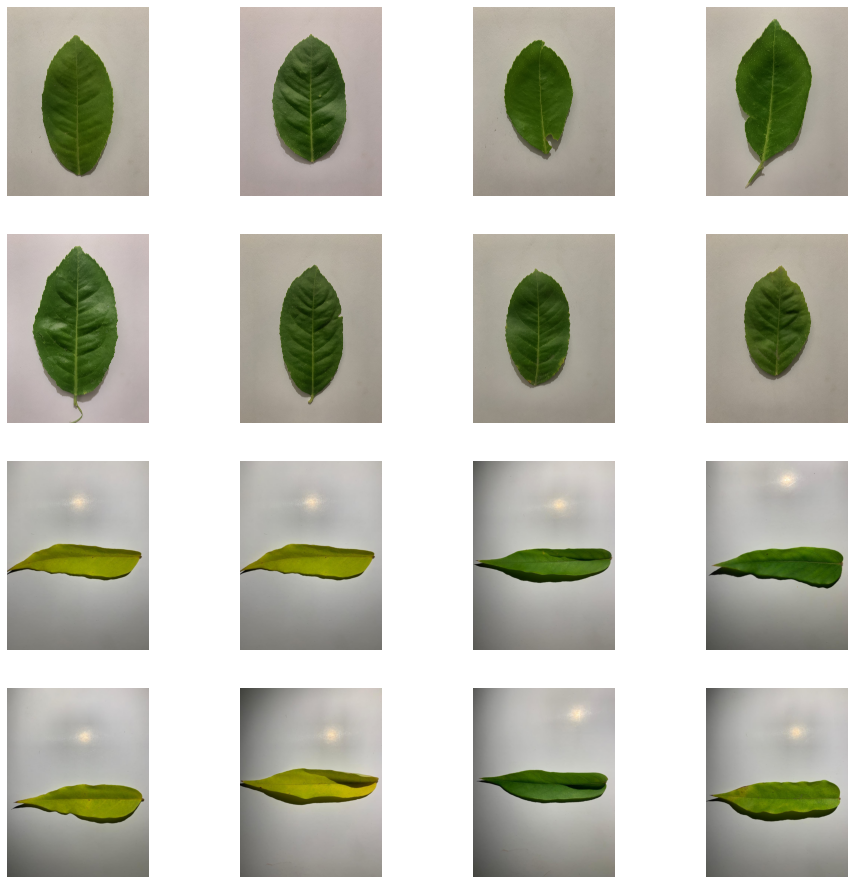

In [37]:
# Tampilkan 8 image per kelas dengan ukuran 4x4 

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_Jeruk_pix = [os.path.join(train_Jeruk_dir, fname) 
                for fname in os.listdir(train_Jeruk_dir)[pic_index-8:pic_index]]
next_Blimbing_pix = [os.path.join(train_Blimbing_dir, fname) 
                for fname in os.listdir(train_Blimbing_dir)[pic_index-8:pic_index]]

for i, img_path in enumerate(next_Jeruk_pix+next_Blimbing_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [38]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [39]:
# Gather data validation
val_data = []
val_label = []
for r, d, f in os.walk(validation_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

<h3>Data Preprocessing</h3>

In [40]:
# Tampilkan shape dari data train dan data validation
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (29, 150, 150, 3)
Train Label =  (29,)
Validation Data =  (28, 150, 150, 3)
Validation Label =  (28,)


In [41]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [177 192 201]
Data setelah di-normalisasi  [0.69411767 0.7529412  0.7882353 ]


In [42]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[1:15])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_train[1:15])

Label sebelum di-encoder  ['Jeruk' 'Jeruk' 'Jeruk' 'Jeruk' 'Jeruk' 'Jeruk' 'Jeruk' 'Jeruk' 'Jeruk'
 'Jeruk' 'Jeruk' 'Jeruk' 'Jeruk' 'Jeruk']
Label setelah di-encoder  [1 1 1 1 1 1 1 1 1 1 1 1 1 1]


<h3>Definisikan Model</h3>

In [43]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [44]:
# Buat model dengan 1 input layer, 1 hidden layer, dan 1 output layer
img_input = layers.Input(shape=(150, 150, 3)) # layer input
x = layers.Flatten()(img_input) # ubah dari matriks 150x150x3 menjadi vektor
x = layers.Dense(128, activation='relu')(x) # hidden layer 1 dengan 128 neuron
output = layers.Dense(1, activation='sigmoid')(x) # output layer dengan 1 neuron (binary)

# Definisikan modelnya
model = Model(img_input, output)

In [45]:
# Tampilkan model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 flatten (Flatten)           (None, 67500)             0         
                                                                 
 dense (Dense)               (None, 128)               8640128   
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 8,640,257
Trainable params: 8,640,257
Non-trainable params: 0
_________________________________________________________________


In [46]:
from tensorflow.keras.optimizers import Adam

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [47]:
H = model.fit(x_train, y_train, batch_size=20, epochs=50, validation_data=(x_val, y_val))

Epoch 1/50
2/2 [==============================] - 1s 246ms/step - loss: 10.2988 - acc: 0.5172 - val_loss: 4.2384 - val_acc: 0.5714
Epoch 2/50
2/2 [==============================] - 0s 76ms/step - loss: 1.1943 - acc: 0.6897 - val_loss: 0.0481 - val_acc: 0.9643
Epoch 3/50
2/2 [==============================] - 0s 72ms/step - loss: 6.4875e-11 - acc: 1.0000 - val_loss: 1.2614e-05 - val_acc: 1.0000
Epoch 4/50
2/2 [==============================] - 0s 80ms/step - loss: 0.0583 - acc: 0.9655 - val_loss: 4.8033e-04 - val_acc: 1.0000
Epoch 5/50
2/2 [==============================] - 0s 75ms/step - loss: 4.6278e-04 - acc: 1.0000 - val_loss: 2.4651e-08 - val_acc: 1.0000
Epoch 6/50
2/2 [==============================] - 0s 86ms/step - loss: 7.2350e-10 - acc: 1.0000 - val_loss: 1.6544e-11 - val_acc: 1.0000
Epoch 7/50
2/2 [==============================] - 0s 72ms/step - loss: 1.5971e-11 - acc: 1.0000 - val_loss: 5.1727e-14 - val_acc: 1.0000
Epoch 8/50
2/2 [==============================] - 0s 75ms/s

<h3>Evaluasi Model</h3>

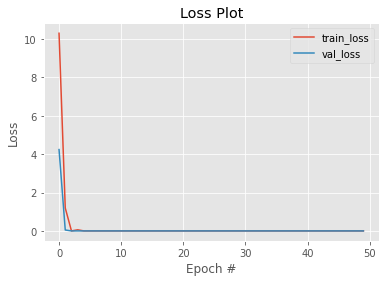

In [48]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

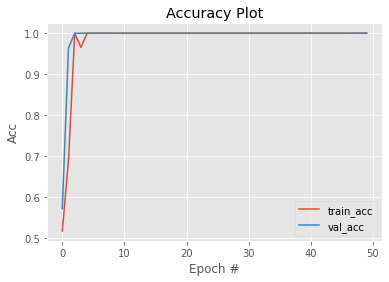

In [49]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 50), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [50]:
from sklearn.metrics import classification_report

pred = model.predict(x_val)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_val, labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14

    accuracy                           1.00        28
   macro avg       1.00      1.00      1.00        28
weighted avg       1.00      1.00      1.00        28

